# Import Libraries

In [13]:
# !pip install keras
# !pip install scikit-learn
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install tensorflow

In [14]:
from keras.datasets import cifar10
import numpy as np; 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
from numpy import argmax
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt;   
import time

# Loading CIFAR_10 data

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3) (50000, 1)
[9]


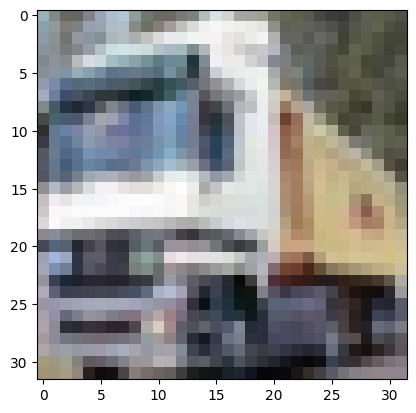

[4]


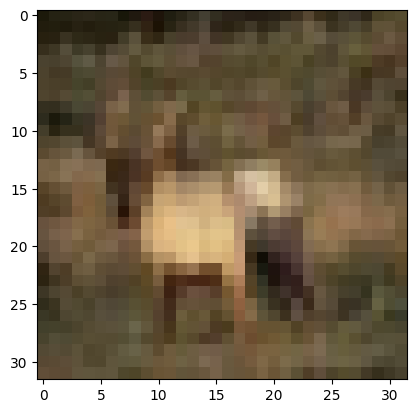

[1]


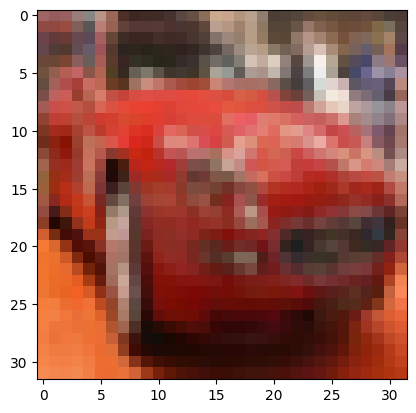

[7]


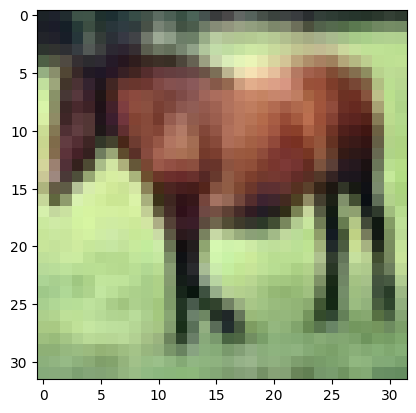

[3]


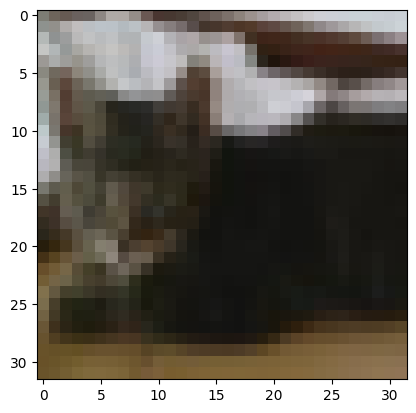

[7]


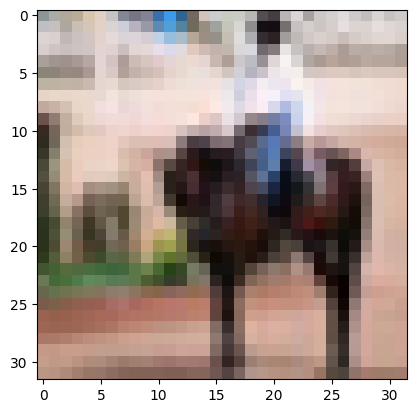

[2]


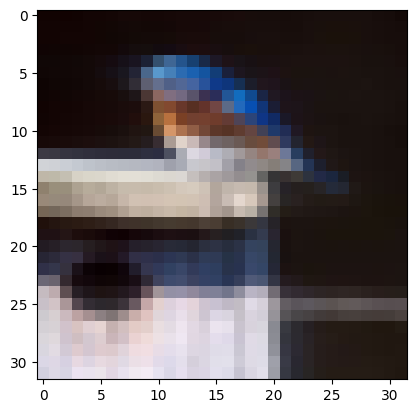

[9]


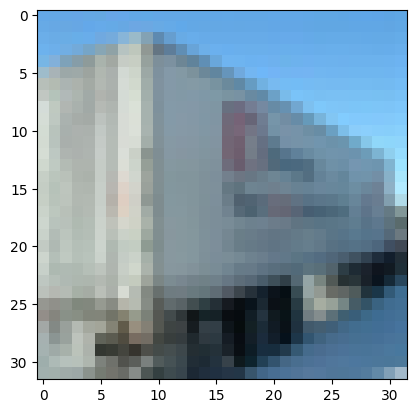

[3]


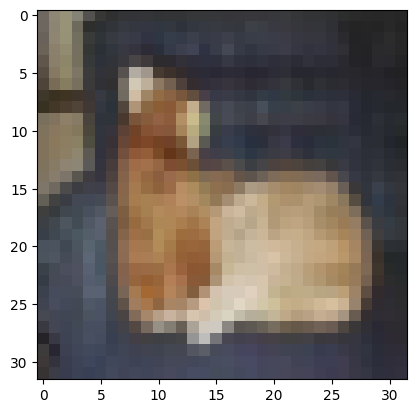

[6]


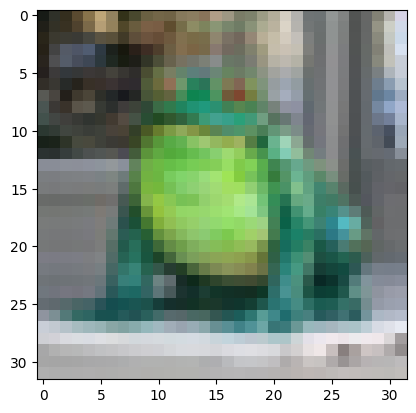

In [16]:
print(x_train.shape, y_train.shape)

"""
[0] airplane
[1] car
[2] bird
[3] cat
[4] deer
[5] dog
[6] frog
[7] horse
[8] ship
[9] truck
"""

for j in range(1,20,2):
            print(y_train[j])
            plt.imshow(x_train[j][:,:,:],cmap ='gray') 
            plt.show()
            time.sleep(0.1) 


In [17]:
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
x_train  /= 255
x_test /= 255

In [20]:
'''DEFINE CNN MODEL'''
num_classes = 10
def baseline_model():
	# create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # HIDDEN LAYER
    model.add(Dense(num_classes, activation='softmax'))
    	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [21]:
'''DEFINE ANOTHER CNN MODEL FOR COMPERISON'''
def baseline_model2():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), padding='same', input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # HIDDEN LAYER
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
def custom_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# MODEL TARINING

In [9]:
'''MODEL TRAINING'''
model1 = baseline_model()
model1.summary()
model1_history = model1.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 806,666
Trainable params: 806,666
Non-trainable params: 0
__________________________________________________

In [10]:
# 32 examples in a mini-batch, 
#smaller batch size means more updates in one epoch

# repeat 10 times 

# Fit the model


In [11]:
model2= baseline_model2()
model2.summary()
model2_history = model2.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [12]:
model3= custom_model()
model3.summary()
model3_history = model3.fit(x_train, y_train, epochs=20, batch_size=32, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

# MODEL EVALUATION

In [13]:
scores_model1 = model1.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate of baseline_model: %.2f" % (100*scores_model1[1]))
print("CNN Error of baseline_model: %.2f%%" % (100-scores_model1[1]*100))

Accuracy rate of baseline_model: 61.52
CNN Error of baseline_model: 38.48%


In [14]:
scores_model2 = model2.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate of baseline_model2: %.2f" % (100*scores_model2[1]))
print("CNN Error of baseline_model2: %.2f%%" % (100-scores_model2[1]*100))

Accuracy rate of baseline_model2: 66.98
CNN Error of baseline_model2: 33.02%


In [15]:
scores_model3 = model3.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate of baseline_model2: %.2f" % (100*scores_model3[1]))
print("CNN Error of baseline_model2: %.2f%%" % (100-scores_model3[1]*100))

Accuracy rate of baseline_model2: 82.84
CNN Error of baseline_model2: 17.16%


# RESULTS PLOTTING

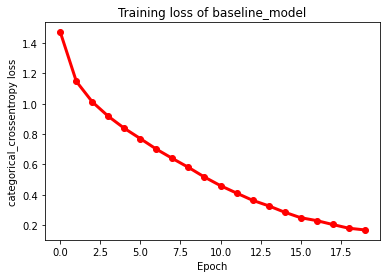

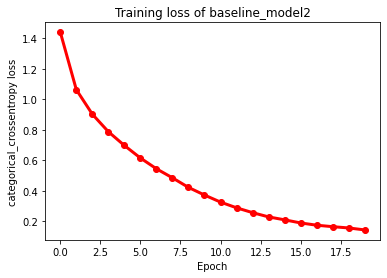

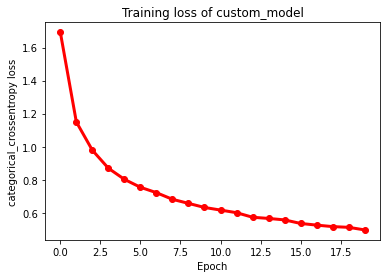

In [16]:
%matplotlib inline
plt.plot(model1_history.history['loss'],marker='o',linewidth=3, color="red")
plt.title('Training loss of baseline_model')
plt.xlabel("Epoch")
plt.ylabel("categorical_crossentropy loss")
plt.show()


%matplotlib inline
plt.plot(model2_history.history['loss'],marker='o',linewidth=3, color="red")
plt.title('Training loss of baseline_model2')
plt.xlabel("Epoch")
plt.ylabel("categorical_crossentropy loss")
plt.show()

%matplotlib inline
plt.plot(model3_history.history['loss'],marker='o',linewidth=3, color="red")
plt.title('Training loss of custom_model')
plt.xlabel("Epoch")
plt.ylabel("categorical_crossentropy loss")
plt.show()

313/313 - 1s - 660ms/epoch - 2ms/step


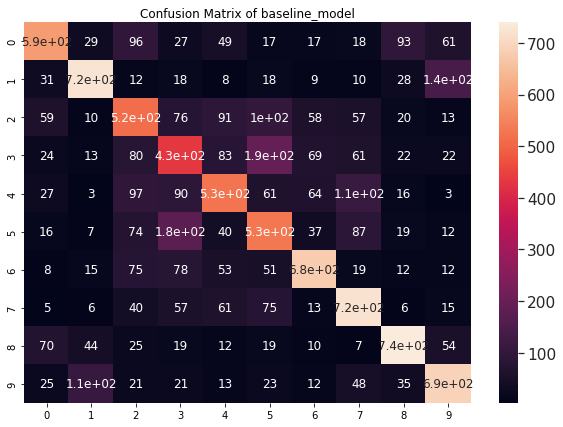

In [17]:
Y_pred = model1.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
cm_model1 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
df_cm_model1 = pd.DataFrame(cm_model1, range(10), range(10))
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix of baseline_model")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_model1, annot=True,annot_kws={"size": 12})# font size
plt.show()

313/313 - 1s - 939ms/epoch - 3ms/step


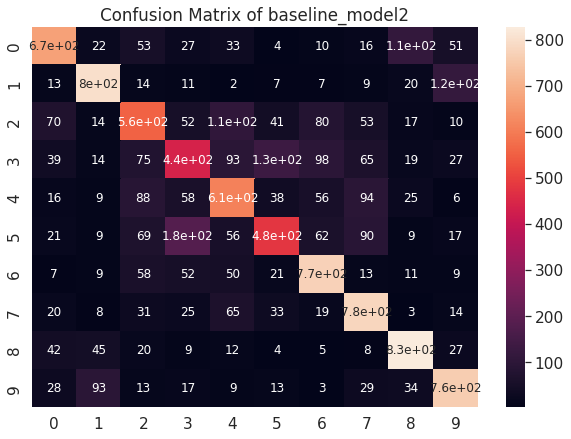

In [18]:
Y_pred = model2.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
cm_model2 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
df_cm_model2 = pd.DataFrame(cm_model2, range(10), range(10))
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix of baseline_model2")
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_model2, annot=True,annot_kws={"size": 12})# font size
plt.show()

313/313 - 2s - 2s/epoch - 6ms/step


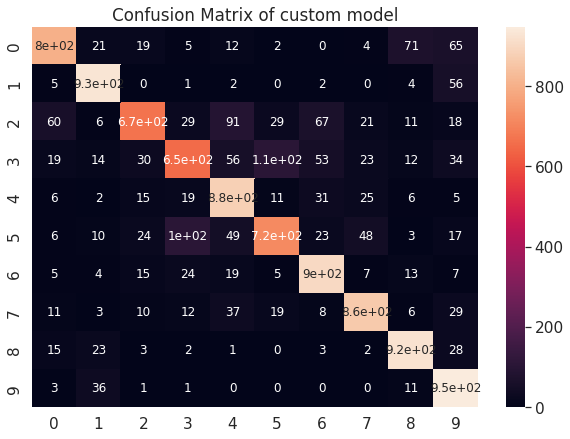

In [19]:
Y_pred = model3.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
cm_model3 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
df_cm_model3 = pd.DataFrame(cm_model3, range(10), range(10))
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix of custom model")
sn.set(font_scale=1.4)
sn.heatmap(df_cm_model3, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [25]:
import os
os.system('jupyter nbconvert --to html CIFAR10_object_classification.ipynb')

[NbConvertApp] Converting notebook CIFAR10_object_classification.ipynb to html
[NbConvertApp] Writing 1081942 bytes to CIFAR10_object_classification.html


0